In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [21]:
# Define dataset paths dynamically
base_dir = os.getcwd()
dataset_dirs = {
    "train": os.path.join(base_dir, "dataset", "Train"),
    "valid": os.path.join(base_dir, "dataset", "Valid"),
    "test": os.path.join(base_dir, "dataset", "Test")
}

In [22]:
# Load training dataset with specified parameters
train_data = tf.keras.utils.image_dataset_from_directory(
    dataset_dirs["train"],
    label_mode="categorical",
    image_size=(128, 128),
    shuffle=True
)

Found 900 files belonging to 3 classes.


In [23]:
# Extract and display class labels
class_labels = train_data.class_names
print("Detected Classes:", class_labels)

Detected Classes: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [24]:
# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))

In [25]:
# Build CNN Model
CNN_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_labels), activation='softmax')
])

d:\Project_Env\ml_test\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Compile the model
CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model
history = CNN_model.fit(train_data, epochs=10, validation_data=train_data)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 600ms/step - accuracy: 0.4144 - loss: 1.0869 - val_accuracy: 0.8289 - val_loss: 0.5125
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 568ms/step - accuracy: 0.7539 - loss: 0.5089 - val_accuracy: 0.6056 - val_loss: 0.9450
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 519ms/step - accuracy: 0.7663 - loss: 0.5011 - val_accuracy: 0.7956 - val_loss: 0.4470
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 580ms/step - accuracy: 0.8588 - loss: 0.3403 - val_accuracy: 0.9556 - val_loss: 0.1257
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 735ms/step - accuracy: 0.9360 - loss: 0.1790 - val_accuracy: 0.9489 - val_loss: 0.1361
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 754ms/step - accuracy: 0.9476 - loss: 0.1562 - val_accuracy: 0.9778 - val_loss: 0.0751
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 596ms/step - accuracy: 0.9228 - loss: 0.1972 - val_accuracy: 0.9356 - val_loss: 0.1384
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 537ms/step - accuracy: 0.9465 - loss: 0.1395 - val_accu

In [28]:
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,915,083 (37.82 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,056 (25.22 MB)

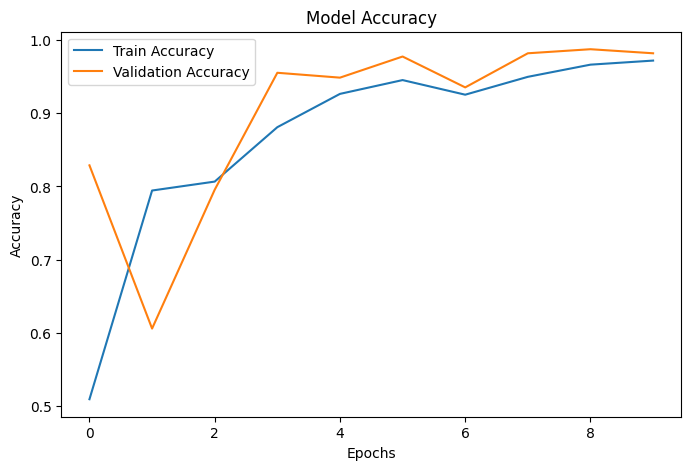

In [29]:
# Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()


In [30]:
# Save the trained model
CNN_model.save("potato_disease_model.h5")
print("Model saved successfully!")

Model saved successfully!
